# Bayesian

## Bayesian Theory Intro

### Bayes Rule

* Probability distribution:
  * Marginal distributions: $p(A), p(B)$
    $$p(A) = \sum_{B}p(A, B)$$
    $$p(B) = \sum_{A}p(A, B)$$
  * Join distributions: $p(A, B)$
  * Conditional disbribution: $P(A|B), p(B|A)$
    $$p(A|B)=\frac{p(A,B)}{p(B)} == \frac{p(A,B)}{\sum_{A}p(A,B)}$$
    $$p(B|A)=\frac{p(A,B)}{p(A)} == \frac{p(A,B)}{\sum_{B}p(A,B)}$$
  * Derive Bayes Rule: Conditional probability is equal to join distribution divided by total distribution of prior
    $$p(A, B) = p(A|B)p(B) = p(B|A)p(A)$$
    $$p(B|A) = \frac{p(A, B)}{p(A)} = \frac{p(A|B)p(B)}{\sum_{B}P(A,B)}$$
    $$p(A|B) = \frac{p(A, B)}{p(B)} = \frac{p(A|B)p(B)}{\sum_{A}P(A,B)}$$
  * For continuous distribution, we would use integral instead of sum
* Gambler's Fallacy
  * If a randome event is independent, the past will not impact future probability. The future chance is always the same regardless of past winning of lossing
* The Monty Hall Problem


### Maxmum Likelihood Estimation

* Giving a set of data, fit the model to the data with model parameters that achieve the best fit.
* Bernoulli distribution (coil flip)
  * Discrete random variable
  * PMF (Probability mass function): x can be either 0 or 1
    $$p(x) = \theta^x(1 - \theta)^{1-x}$$
    $$p(x = 1) = \theta$$
    $$p(x = 0) = 1 - \theta$$
  * Maximum Likelyhood function (coin flip many times)
    * With $data = \{X1, X2, ... X_n\}$
    * liklihood is $L(\theta) = p(data | \theta) = \prod^N_{i}p(x_i|\theta) = \prod^n_{i}\theta^{x_i}(1-\theta)^{1-x_i}$
      * x is either 0 or 1, $\theta$ is the variable 
    * We are trying to solve $\theta$ so we can maximizing the $L$ likelihood
    * $\frac{dL}{d\theta} = 0\ or\ \hat{\theta} = argmaxL(\theta)$
    * Bernoulli likihood is not the same is binomial distribution which consider order of events


### Bayesian Machine Learning

* The Bayesian Approach
  * `Everything is a random variable`
  * e.g. Gaussian distribution with $\mu$ and $\sigma$
    * Frequentist approach treat $\mu$ and $\sigma$ as a number calculated from the samples
    * Bayesian appraoch treat $\mu$ and $\sigma$ as a random variable, we try to find $p(\mu, \sigma^2 | X)$ (find distribution instead of number)
* In the machine learning context
  * e.g. Lineary Regression $y = W^Tx$, instead of finding a $W$, we try to solve for the distribution of $w$, if x, y is training data, we solve for $p(W | x, y)$
* Bayesign Network
  * Bayes nets are a general model
  * We can model specific dependencies based on your understanding of the system
    * e.g. LDA (Latent Dirichlet Allocation) is a bayes network model

## Frequentist Statistical Testing

### Confident Interval

* Intuition: things that affect our confidence in an estimate
    * e.g. maximum Likelihood Estimate of Mean $\hat{\mu} = \bar{x} = \frac{1}{N}\sum^N_{i-1}x_i$ is the sample mean
    * how spread out the samples are
    * How many samples there are
* Z-confidence interval
    $$Data: \{x_1, ..., x_N\}$$
    $$Sample\ Mean: \hat{\mu} = \bar{x} = \frac{1}{N}\sum^N_{i-1}x_i$$
    $$Sample\ variance: \hat{\sigma}^2 = \frac{1}{N-1}\sum^N_{i-1}(x_i - \bar{x})^2$$
    * $\hat{\sigma}$ is the sample standard deviation
    * $95\%\ (\gamma)\ CI = [\hat{\mu} - 1.96\frac{\hat{\sigma}}{\sqrt{N}},\hat{\mu} + 1.96\frac{\hat{\sigma}}{\sqrt{N}}]$
    * $\sigma$ describe spread (position proportional) more spread out less confident. sample size N, more samples more confident (inversely propotional)

* If Data is normally distributed
    * Function of random variables is also a random variable of the same distribution (e.g. sum), we can use this property find the distribution of mean ($\hat{\mu}$) and variance {$\hat{\sigma}^2$)
    $$E(\hat{\mu}) = E(\frac{1}{N}\sum^N_{i-1}x_i) = \frac{1}{N}E(X_1) + \frac{1}{N}E(X_2) + ... = \frac{1}{N}\mu + \frac{1}{N}\mu+ ... = \mu$$
    $$var(\hat{\mu}) = var(\frac{1}{N}\sum^N_{i-1}x_i) = E[(\frac{1}{N}\sum^N_{i-1}x_i - \mu)^2] = \frac{\sigma^2}{N}$$
    $$\hat{\mu} \sim N(\mu, \frac{\sigma^2}{N})$$
    * when N is larger, variance of estimate is smaller (sample size)
    * when $\sigma$ is larger, variance of estimate is larger (spread)
    * Given $$Z = N(0, 1)$$, we can use pdf to calculate the area under the curve, to get Z value on the x axis based on CI (e.g. 95%)
    * area under the curve is 2.5% = 0.025 => $Z_{left} = -1.96$ 
    * area under the curve is 97.5% = 0.975 => $Z_{right} = +1.96$ 
    * We can apply standardization to transform a RV t standard normal by subtract $\mu$ divided by $\sigma$
    * We can use $\mu$ and $\sigma$ to calculate CI with $95\%\ (\gamma)\ CI = [\hat{\mu} - 1.96\frac{\hat{\sigma}}{\sqrt{N}},\hat{\mu} + 1.96\frac{\hat{\sigma}}{\sqrt{N}}]$ if we want to use 95% CI
    * 95% is not a probablility but frequency of 95% of time. We estimate $\sigma = \frac{\sigma_{sample}}{N - 1}$
* In practice, we use CLT to estimate other distribution to Normali distbution so we calcluate CI use the same above approach
    * e.g Bernoulli to normal: $\hat{p} = N(p, \frac{p(1-p)}{N})$
* T-distrubtion, a better estimation than Z when sample size is small
    $$t = \frac{Z}{\sqrt{V/v}} \sim t_v$$
    * $V$ is chi-square disbribution, $v$ is degree of freedom = N-1

In [64]:
import numpy as np
from scipy.stats import norm, t
import pandas as pd
import seaborn as sns
np.random.seed(1)

In [8]:
N = 1000
mu = 5
sigma = 2
# create random samples by apply reverse of standardization
X = np.random.randn(N)*sigma + mu 

In standard statistical practice, for `np.std` to set `ddof=1` provides an unbiased estimator of the variance of the infinite population whereas `ddof=0` provides a maximum likelihood estimate of the variance for normally distributed variables. 

In [10]:
# Z confidence interval
mu_hat = np.mean(X)
sigma_hat = np.std(X, ddof=1) 
z_left = norm.ppf(0.025)
z_right = norm.ppf(0.975)
lower = mu_hat + z_left*sigma_hat/np.sqrt(N)
upper = mu_hat + z_right*sigma_hat/np.sqrt(N)
print(mu_hat, lower, upper)

5.054650886789156 4.926904581440878 5.182397192137435


In [12]:
# t confidence interval
mu_hat = np.mean(X)
sigma_hat = np.std(X, ddof=1) 
t_left = t.ppf(0.025, df=N-1)
t_right = t.ppf(0.975, df=N-1)
lower = mu_hat + t_left*sigma_hat/np.sqrt(N)
upper = mu_hat + t_right*sigma_hat/np.sqrt(N)
print(mu_hat, lower, upper)

5.054650886789156 4.926749622547115 5.182552151031198


In [14]:
def experiment():
    X = np.random.randn(N)*sigma + mu
    mu_hat = np.mean(X)
    sigma_hat = np.std(X, ddof=1) 
    t_left = t.ppf(0.025, df=N-1)
    t_right = t.ppf(0.975, df=N-1)
    lower = mu_hat + t_left*sigma_hat/np.sqrt(N)
    upper = mu_hat + t_right*sigma_hat/np.sqrt(N)
    return mu > lower and mu < upper
    
def sim_experiment(M):
    results = [experiment() for _ in range(M)]
    return np.mean(results)

In [15]:
sim_experiment(10000)

0.9506

### Statistical Significant

* Cannot just compare averages (effect size) to fill confident
    * num of sample matters
    * variance of samples

### Hypothesis Testing (Frequetist Approach)

* 2 groups of data (a.k.a 2 sample test)
* 1 groups of data (a.k.a 1 sample test)
* Hpyotehsis: ($H_0$ Null, $H_1$ Alternative)
    $$H_0: \mu_1 = \mu_2$$
    $$H_1: \mu_1 \neq \mu_2$$ 
    * 2 sided: e.g. $H_1: \mu_1 \neq \mu_2$
    * 1 sided: e.g. $H_1: \mu_1 > \mu_2$
    
### P-value
* Interpretation: the probability of observation a result as streme or more estreme than what was observed assuming the null hypothesis is true
* significant level (a significant threshold for max allowed probability of false alarm (a.k.a, FP, type I error)
    * if p-value < 5%, we declare the result is statistically significant, in other words, the probabiliyt of get false alarm, type I error, false positive is 5%, and we can reject the null hypothesis and result is statistically significant
    * if p-value > 5%, we fail to reoject null hypothesis, it does not equal to we accept the null hypothesis. If we reject tne null hypothesis also does not imply we accept alternatively hypothesis. Because we are describe the given sample which is not equal to the actual facts

### Z-Test

* 1 sample Z-test: rewrite null hypothesis based on Z statistics:
    $$ H_0: z = \frac{\hat{\mu} - \mu_0}{\sigma/\sqrt{N}} \sim N(0, 1)$$
    * if $H_0$ is true, then z will faill in a standard normal disbrbution 95% CI area under the curve
    * rejecting the null means z is very unlikely faill in, or z > +1.96 or z < -1.96
* 2 sample Z-test:
    $$H_0: \mu_1 = \mu_2$$
    $$H_1: \mu_1 \neq \mu_2$$
    * rewrite hypothesis $y=\mu_1 - \mu_2$
    $$H_0: y = 0$$
    $$H_1: y \neq 0$$
    * rewrite 
    $$H_0: \hat{y} \sim N(0, \sigma^2_{\hat{y}})$$ or
    $$H_0: \hat{y} \sim N(\mu_0, \sigma^2_{\hat{y}})$$
    $$H_1: y \neq 0$$
    * to find variance or $\sigma_{\hat{y}}$
    $$var(\hat{y}) = \frac{\sigma^2_1}{N_1}+\frac{\sigma^2_2}{N_2}$$
    $$Z = \frac{\hat{y} - \mu_0}{\sigma_{\hat{y}}} = \frac{\hat{y} - \mu_0}{\sqrt{\frac{\sigma^2_1}{N_1}+\frac{\sigma^2_2}{N_2}}}$$
    $$ p = p_{left} + p_{right}$$

In [71]:
import numpy as np
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt
np.random.seed(0)

In [30]:
N = 1000
mu = 0.2
sigma = 1
X = np.random.randn(N)*sigma + mu

In [31]:
# two-sided test with build-in function(compare to 0 default)
ztest(X)

(4.955218787152404, 7.22489458805533e-07)

In [32]:
# two-sided test manual
mu_hat = X.mean()
sigma_hat = X.std(ddof=1)
z = mu_hat / (sigma_hat/np.sqrt(N)) # out mu0 = 0
p_right = 1 - norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))
p = p_right + p_left
z, p

(4.955218787152404, 7.22489458754939e-07)

We can use `norm.sf` (survival function) instead of `1 - norm.cdf` for more accurate value

In [33]:
# one-sided test with build-in function
# half p-value of two-sided test
ztest(X, alternative='larger')

(4.955218787152404, 3.612447294027665e-07)

In [34]:
# one-sited test manual
mu_hat = X.mean()
sigma_hat = X.std(ddof=1)
z = mu_hat / (sigma_hat/np.sqrt(N))
p = 1-norm.cdf(np.abs(z))
z, p

(4.955218787152404, 3.6124472935217256e-07)

In [36]:
# test null under different different value using build-in function
# Case fail to reject null
mu0 = 0.2
ztest(X, value=mu0)

(-1.4492187904420355, 0.1472764916107175)

In [37]:
# test null under different different value
# Case fail to reject null
mu_hat = X.mean()
sigma_hat = X.std(ddof=1)
z = (mu_hat - mu0)/ (sigma_hat/np.sqrt(N)) # out mu0 = 0
p_right = 1 - norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))
p = p_right + p_left
z, p

(-1.4492187904420355, 0.14727649161071749)

In [56]:
# two-sample test
N0 = 100
mu0 = 0.2
sigma0 = 1
X0 = np.random.randn(N0)*sigma0 + mu0

N1 = 100
mu1 = 0.5
sigma1 = 1
X1 = np.random.randn(N1)*sigma1 + mu1

In [57]:
ztest(X0, X1)

(-1.9039831082750844, 0.056912384145799626)

In [58]:
# two-sample test
mu_hat0 = X0.mean()
mu_hat1 = X1.mean()
var_hat0 = X0.var(ddof=1)
var_hat1 = X1.var(ddof=1)
z = (mu_hat1 - mu_hat0)/np.sqrt(var_hat0/N0 + var_hat1/N1)
p_right = 1 - norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))
p = p_left + p_right
z, p

(1.9039831082750844, 0.05691238414579966)

In [61]:
# Intuition of frequentist statistics
# Simulation of reject null hypothesis when the null is true (false alarm) 5% of the time
num_tests = 10000
results = np.zeros(num_tests)
for i in range(num_tests):
    x1 = np.random.randn(100)
    x2 = np.random.randn(100)
    z, p = ztest(x1, x2)
    results[i] = (p < 0.05)
print(results.mean())

0.0528


In [66]:
df = pd.read_csv('./titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
x1 = df[df['Survived'] == 1]['Fare'].dropna().to_numpy()
x2 = df[df['Survived'] == 0]['Fare'].dropna().to_numpy()

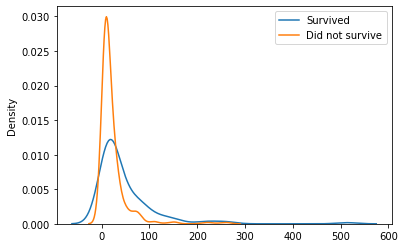

In [73]:
sns.kdeplot(x1, label='Survived')
sns.kdeplot(x2, label='Did not survive')
plt.legend();

In [74]:
x1.mean(), x2.mean()

(48.39540760233918, 22.117886885245902)

In [75]:
ztest(x1, x2)

(7.939191660871055, 2.035031103573989e-15)

In [77]:
df = pd.read_csv('./advertisement_clicks.csv')
df.head()

,advertisement_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


In [84]:
x1 = df[df['advertisement_id'] == 'A']
x2 = df[df['advertisement_id'] == 'B']

In [86]:
print(x1[x1['action'] == 1].shape[0]/x1.shape[0])
print(x2[x2['action'] == 1].shape[0]/x2.shape[0])

0.304
0.372


Can use normal distribution to approximate? or we need to approximate differently?

## Bayesian Testing

### Explore-Exploit Dilemma

* exploration (collect data) (we should reach defined sample size)
* select choice with highest win rate (exploitation) (we should maximize the win)
* They are against each other so a dilemma
* methods and Algorithms to solve this dilemma and find the balance:
    * Epsilon-greedy
    * Optimistic Initial Values
    * UCB1 (Upper Confidence Bound)
    * Thompson Sampling(Bayesian Bandit)
* Application of explore-exploit
    * Comparing things: e.g. CTR

### Epsilon-Greedy Theory

* Choosing best MLE (maximum likelihood estimation) of win rate does not work (a.k.a the **greedy** method: picking the bandit with the highest MLE win rate with no regard to confidence in prediction or amount of data collected)
* Epsilon-greedy idea: have a small probability epsilon ($\epsilon$) of doing sth random (non-greedy), typically around 5 - 10 %
* The purpose of exploration (with nonzero epsilon) is we can collect data about each bandit
* When do we have enought data instead of explore forever?
    * We can apply decay function to $\epsilon$) so it reduce through time
    
    $$E(R) = (1 - \epsilon)p1 + \epsilon(\frac{p1 + p2}{2})$$
    decay epsilon examples:
    $$\epsilon(t) = \epsilon_0\alpha^t$$ 
    or
    $$\epsilon(t) = \frac{a}{log(bt+c)}$$ 

### Interatively update the sample mean

* Calculate $\bar{X}_N$ using $\bar{X}_{N-1}$

    $$\bar{X}_{N} = \bar{X}_{N-1} + \frac{1}{N}(X_{N} - \bar{X}_{N-1})$$


### Bandit Program Template

All bandit program follows the same steps as the following

```python
class mySlotMachine:
    def pull():
        # simulate drawing from the true distribution

def experiment():
    for t in range(iterations):
        # pick a slotMachine to play
        # update algorithm parameters

def results():
    # plot useful infor (reward, best machine, etc)
```



optimal j: 2
mean estimate: 0.16257668711656434
mean estimate: 0.4604904632152589
mean estimate: 0.7396583216933486
Total reward earned: 7106.0
Overall win rate: 0.7106
num of time explored: 1021
num of time exploited: 8979
num of time select optimal bandit: 9307


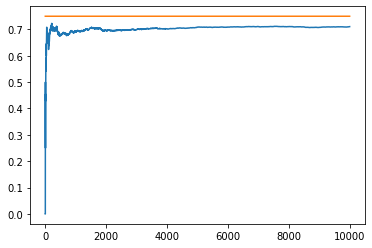

In [104]:
# Epsilon-Greedy
# Draw random from uniformed distribution

NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

class Bandit:
    def __init__(self, p):
        self.p = p #trun win rate of the bandit
        self.p_estimate = 0 # estimated current win rate
        self.N = 0 #num of sample collected so far
        
    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p
    
    def update(self, x):
        self.N += 1
        self.p_estimate = ((self.N - 1) * self.p_estimate + x)/self.N
        
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print("optimal j:", optimal_j)
    
    for i in range(NUM_TRIALS):
        
        # use pesilon-greed to select the next bandit
        if np.random.random() < EPS:
            num_times_explored += 1
            j = np.random.randint(len(bandits))
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])
        
        if j == optimal_j:
            num_optimal += 1
        
        # pull the arm for the bandit with the largest sample
        x = bandits[j].pull()
        
        # update rewards log
        rewards[i] = x
        
        # update the distrbution for the bandit whose arm we just pulled
        bandits[j].update(x)
    
    for b in bandits:
        print(f"mean estimate: {b.p_estimate}")
    
    # print total reward
    print(f"Total reward earned: {rewards.sum()}")
    print(f"Overall win rate: {rewards.sum()/NUM_TRIALS}")
    print(f"num of time explored: {num_times_explored}")
    print(f"num of time exploited: {num_times_exploited}")
    print(f"num of time select optimal bandit: {num_optimal}")
    
    # plot results
    cumulative_rewards = np.cumsum(rewards)
    win_rate = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rate)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()

if __name__ == "__main__":
    experiment()

optimal j: 2
mean estimate: 0.18292682926829273
mean estimate: 0.49136786188579035
mean estimate: 0.7498598497589405
Total reward earned: 7118.0
Overall win rate: 0.7118
num of time explored: 937
num of time exploited: 9063
num of time select optimal bandit: 8919


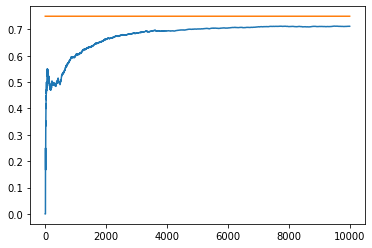

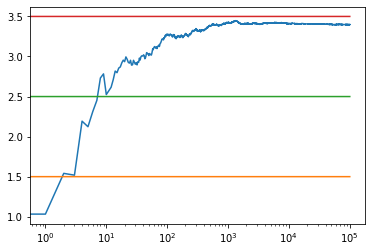

1.4946280376548724
2.4971870267479197
3.497592945409878
percent suboptimal for epsilon = 0.1: 0.06597


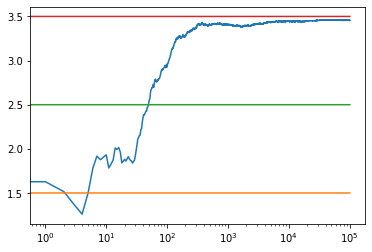

1.5565076888949962
2.5406574050627104
3.5047552829678854
percent suboptimal for epsilon = 0.05: 0.03398


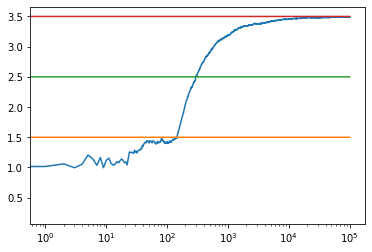

1.5307638374617447
2.4524634774557157
3.499450345313223
percent suboptimal for epsilon = 0.01: 0.00844


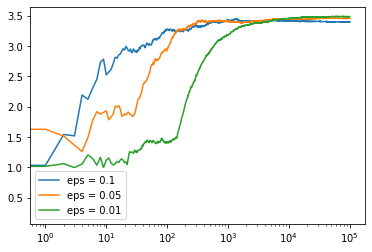

In [110]:
# Epsilon-Greedy V1
# Draw random from Gaussian distribution


class BanditArm:
    def __init__(self, m):
        self.m = m 
        self.m_estimate = 0 
        self.N = 0 
        
    def pull(self):
        return np.random.randn()+self.m
    
    def update(self, x):
        self.N += 1
        self.m_estimate = (1 - 1.0/self.N)*self.m_estimate + 1.0/self.N*x
        
def run_experiment(m1, m2, m3, eps, N):
    bandits = [BanditArm(m1), BanditArm(m2), BanditArm(m3)]
    
    # count number of suboptimal choices
    means = np.array([m1, m2, m3])
    true_best = np.argmax(means)
    data = np.empty(N)
    count_suboptimal = 0
    
    for i in range(N):
        
        # epsilon greedy
        p = np.random.random() # prior
        if p < eps:
            j = np.random.choice(len(bandits))
        else:
            j = np.argmax([b.m_estimate for b in bandits])
        
        x = bandits[j].pull()
        bandits[j].update(x)
        
        if j != true_best:
            count_suboptimal += 1
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.m_estimate)
    print("percent suboptimal for epsilon = %s:" % eps, float(count_suboptimal) / N)

    return cumulative_average
if __name__ == "__main__":
    experiment()
    m1, m2, m3 = 1.5, 2.5, 3.5
    c_1 = run_experiment(m1, m2, m3, 0.1, 100000)
    c_05 = run_experiment(m1, m2, m3, 0.05, 100000)
    c_01 = run_experiment(m1, m2, m3, 0.01, 100000)

    # log scale plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(c_05, label='eps = 0.05')
    plt.plot(c_01, label='eps = 0.01')
    plt.legend()
    plt.xscale('log')
    plt.show()

### Optimistic Initial Values

* Simple modification of purely greedy method
* No need for epsilon /random exploration
* Approach:
    * Initialize mean to very large final value (we start with by overestimate the sample mean)
    * Be Greedy
    * choose bandit with the lagest estimated mean
    * Why this will Balance exploration (collect data) and explortation?
        * Early in experiment: less data, estimated mean is large since initial value is large
        * Later in experiment: lost of data, mean continue to get smaller until we stop choosing the bandit or it converges
    * We get arithmetic average even if initial value is very large
* Since it is always greety, this approach does not garanteen we fine the optimal true mean
* Setting the initial value
    * Higher initial value means more exploration (it is a Hyperparameter)

mean estimate: 0.7
mean estimate: 0.7272727272727273
mean estimate: 0.751980744158057
total reward earned: 7506.0
overall win rate: 0.7506
num times selected each bandit: [10.0, 22.0, 9971.0]


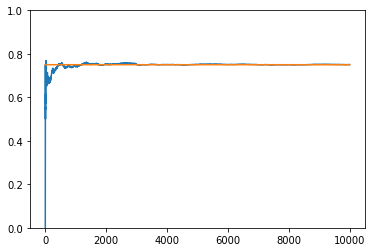

In [3]:
from __future__ import print_function, division
from builtins import range


import matplotlib.pyplot as plt
import numpy as np


NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]


class Bandit:
    def __init__(self, p):
        # p: the win rate
        self.p = p
        self.p_estimate = 5. #overestimate
        self.N = 1. #so the initial value is included in the update() calculation

    def pull(self):
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1
        self.p_estimate = ((self.N - 1) * self.p_estimate + x)/self.N
        

def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

    rewards = np.zeros(NUM_TRIALS)
    for i in range(NUM_TRIALS):
        # use optimistic initial values to select the next bandit
        j = np.argmax([b.p_estimate for b in bandits])

        # pull the arm for the bandit with the largest sample
        x = bandits[j].pull()

        # update rewards log
        rewards[i] = x

        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)


    # print mean estimates for each bandit
    for b in bandits:
        print("mean estimate:", b.p_estimate)

    # print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num times selected each bandit:", [b.N for b in bandits])

    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.ylim([0, 1])
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()

if __name__ == "__main__":
    experiment()

### UCB1